# SVM

https://towardsdatascience.com/a-friendly-introduction-to-support-vector-machines-svm-925b68c5a079
https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/

https://medium.com/machine-learning-101/chapter-2-svm-support-vector-machine-theory-f0812effc72

https://www.analyticsvidhya.com/blog/2017/10/svm-skilltest/

https://medium.com/@myselfaman12345/c-and-gamma-in-svm-e6cee48626be

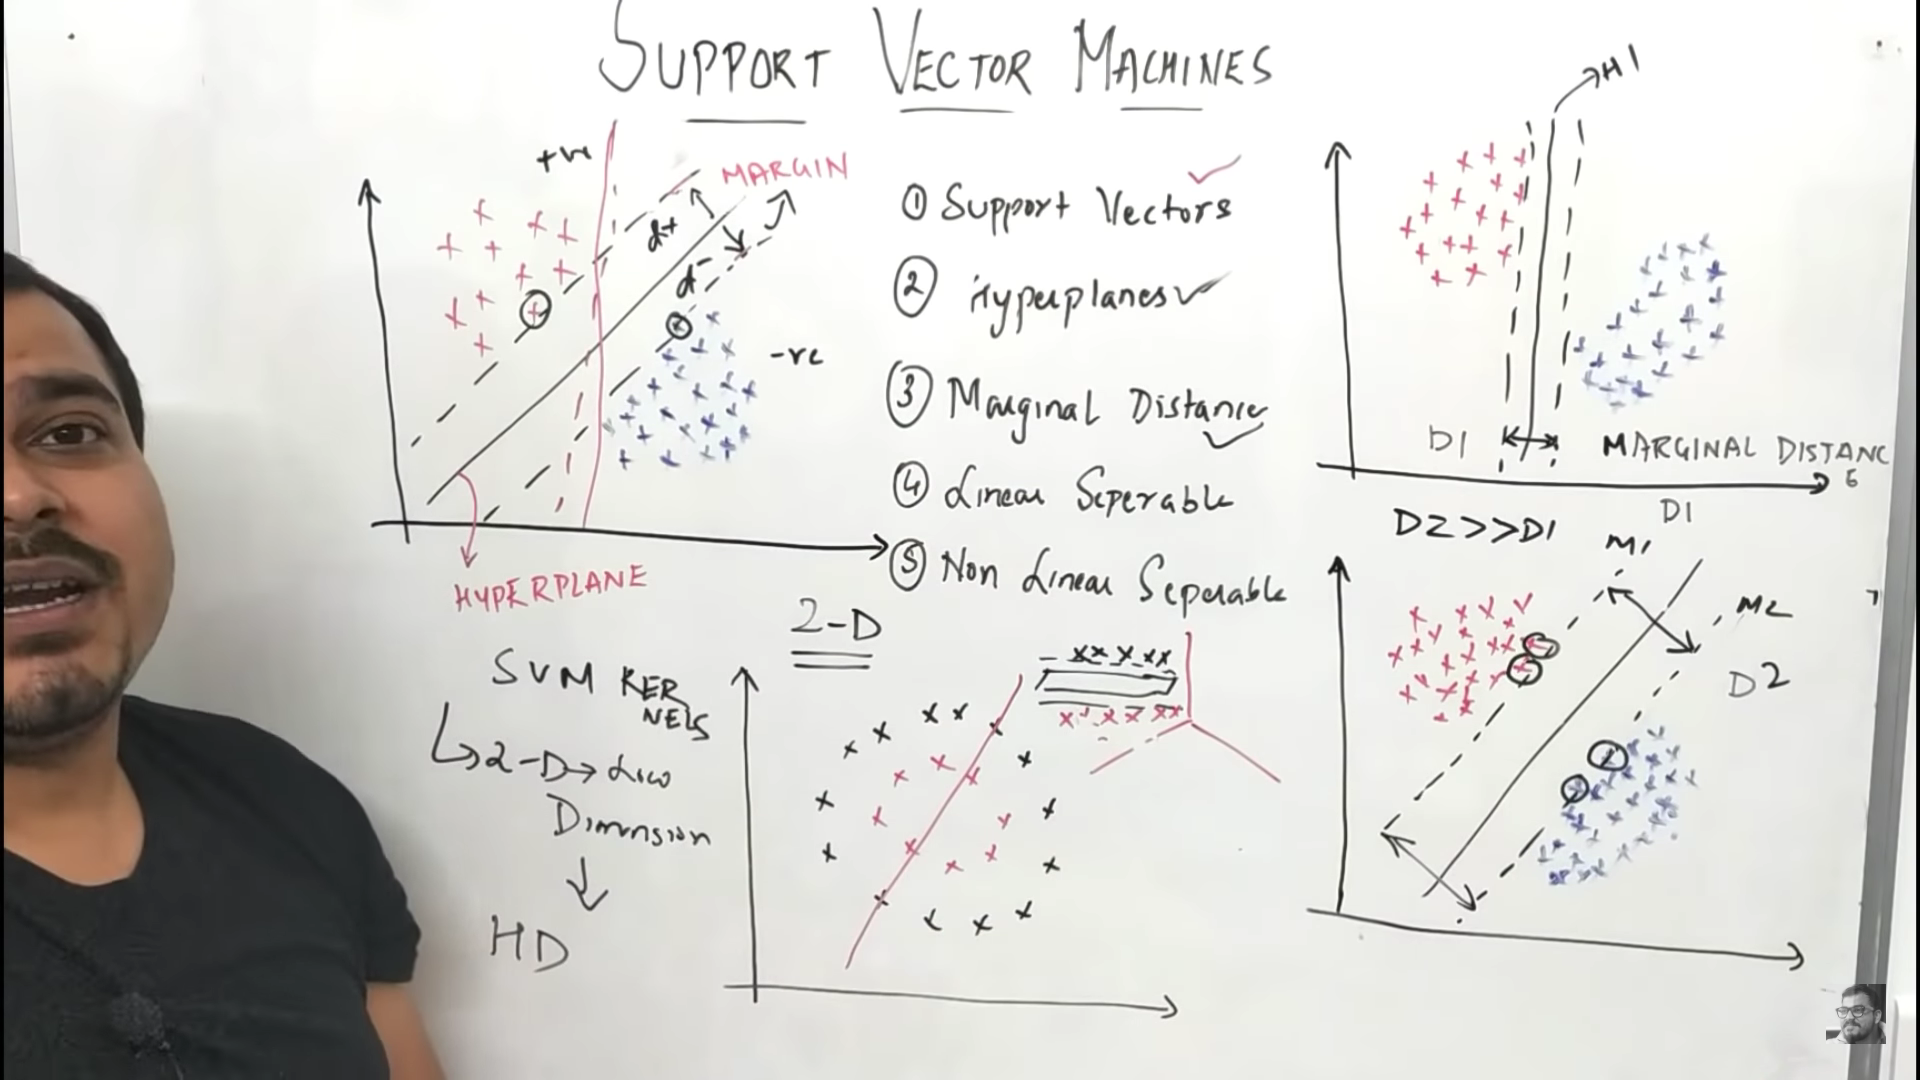

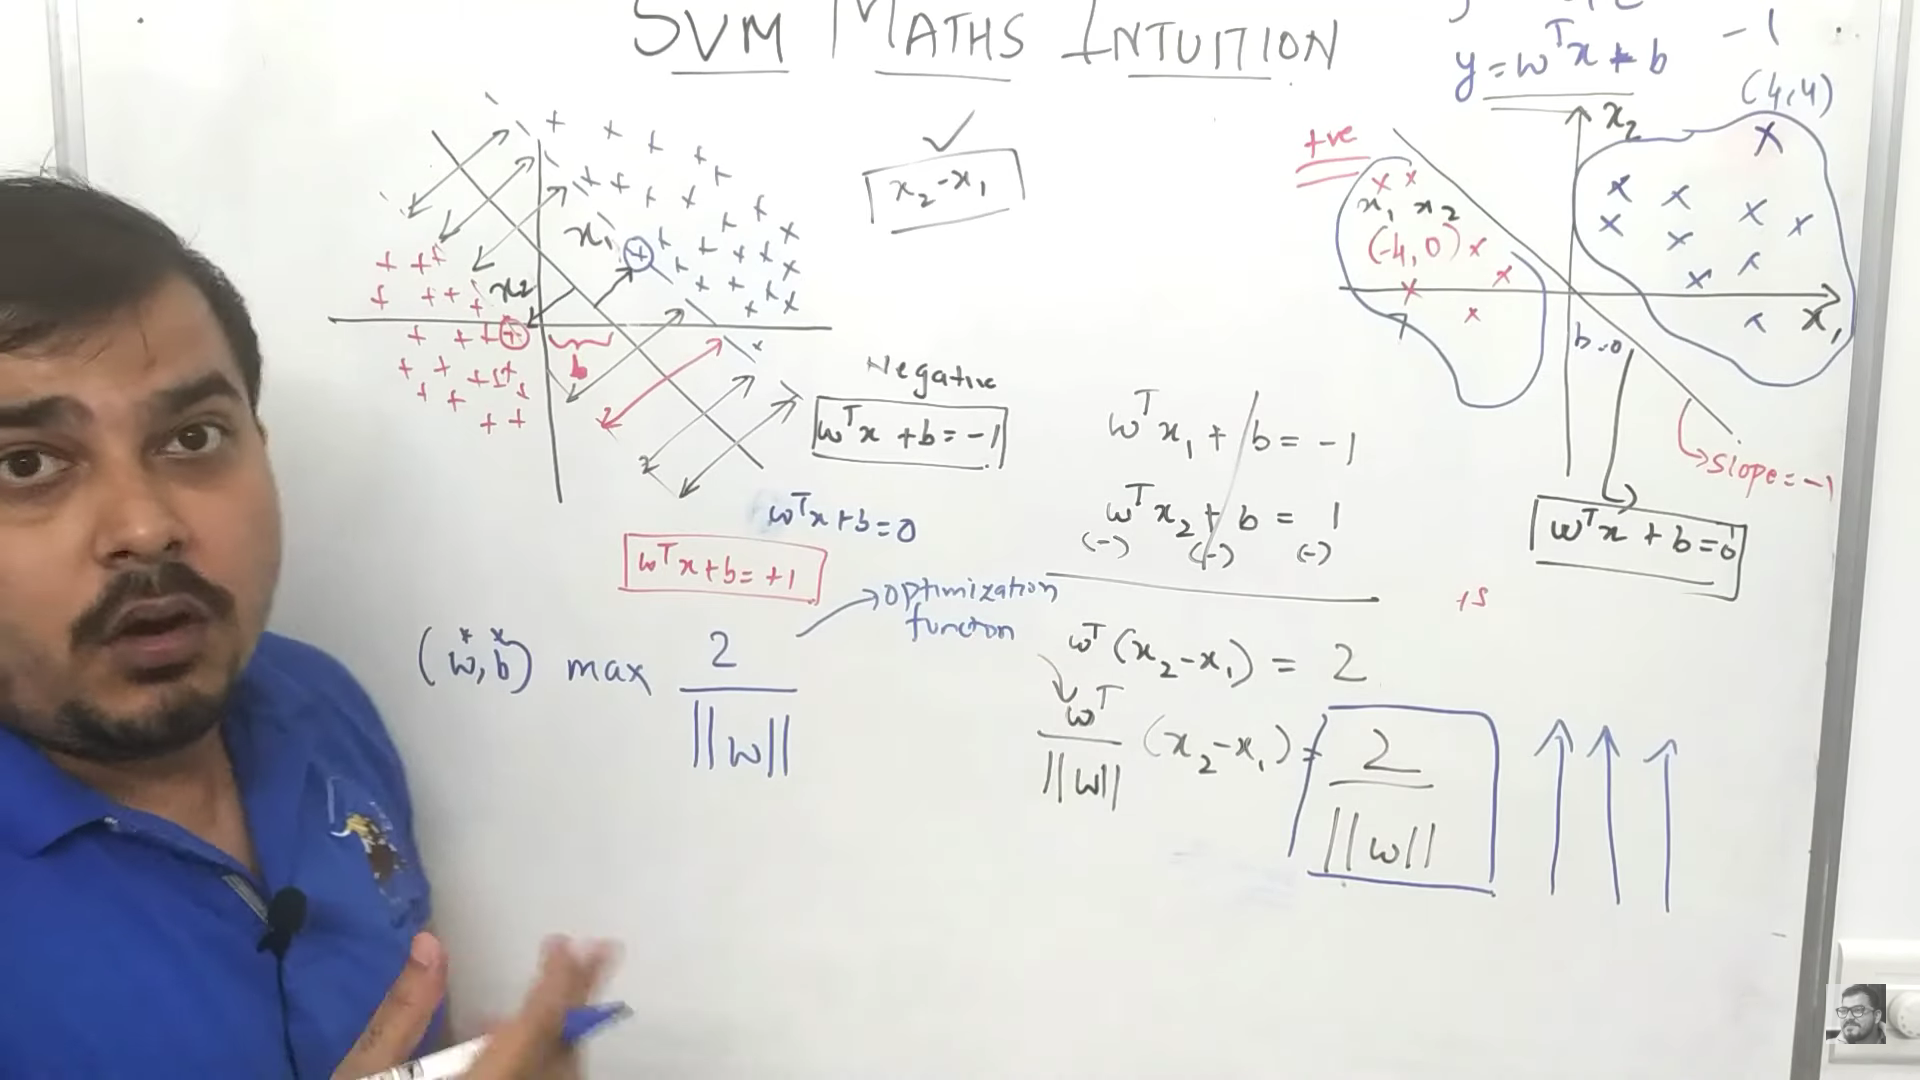

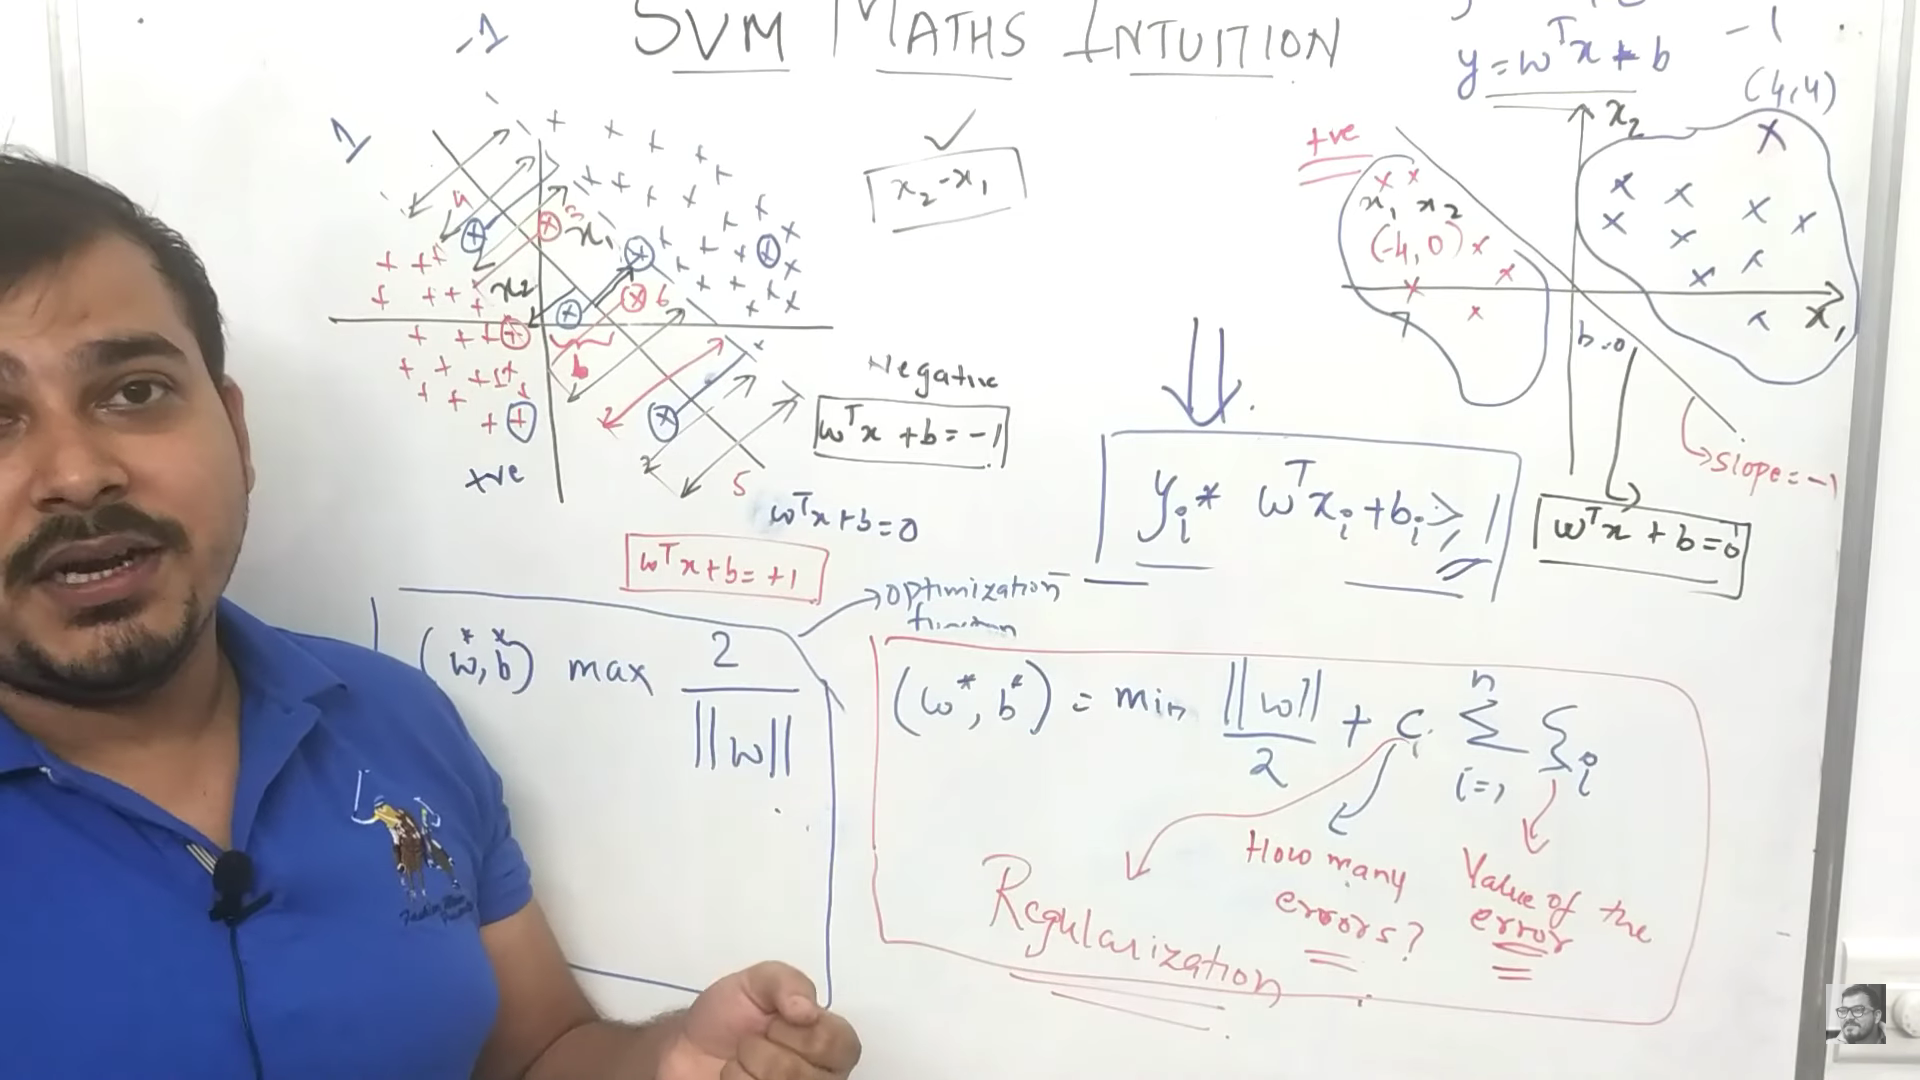

Value of error is distance between that data point from respective marginal plan

https://towardsdatascience.com/svm-hyperparameters-explained-with-visualizations-143e48cb701b -- very important blog

#### Support vector machine creates hyperplan which classify the categories and it also creates two marginal planes at both side. These marginal lines will be having some distance from hyperplan so that it will be linearly seperable from both classification points.

#### Marginal planes will be parrelel to hyperplan and it passes through one of the nearest points from both side. main motive is to maximize the marginal distance in SVM. If we select a hyper-plane having low margin then there is high chance of miss-classification.

#### Points which are passsing through marginal planes from both the sides are called support vectors. The SVM algorithm has a feature to ignore outliers

#### SVM kernals used to handle non-linear seperable points which converts low dimention to high dimention. 

##### sklearn.svm.SVC(C=1.0, kernel='rbf', degree=3, gamma=0.0, coef0=0.0, shrinking=True, probability=False,tol=0.001, 
#####                cache_size=200, class_weight=None, verbose=False, max_iter=-1, random_state=Non

##### we have various options available with kernel like, “linear”, “rbf”,”poly” and others (default value is “rbf”).  Here “rbf” and “poly” are useful for non-linear hyper-plane.

##### gamma: Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. Higher the value of gamma, will try to exact fit the as per training data set i.e. generalization error and cause over-fitting problem.

For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points. C is basically how many worng points it will allow in margin plan.

Gamma means summation of wrong points to the plan so that we can reduse the distance.

I would suggest you go for linear SVM kernel if you have a large number of features (>1000) because it is more likely that the data is linearly separable in high dimensional space. Also, you can use RBF but do not forget to cross-validate for its parameters to avoid over-fitting.

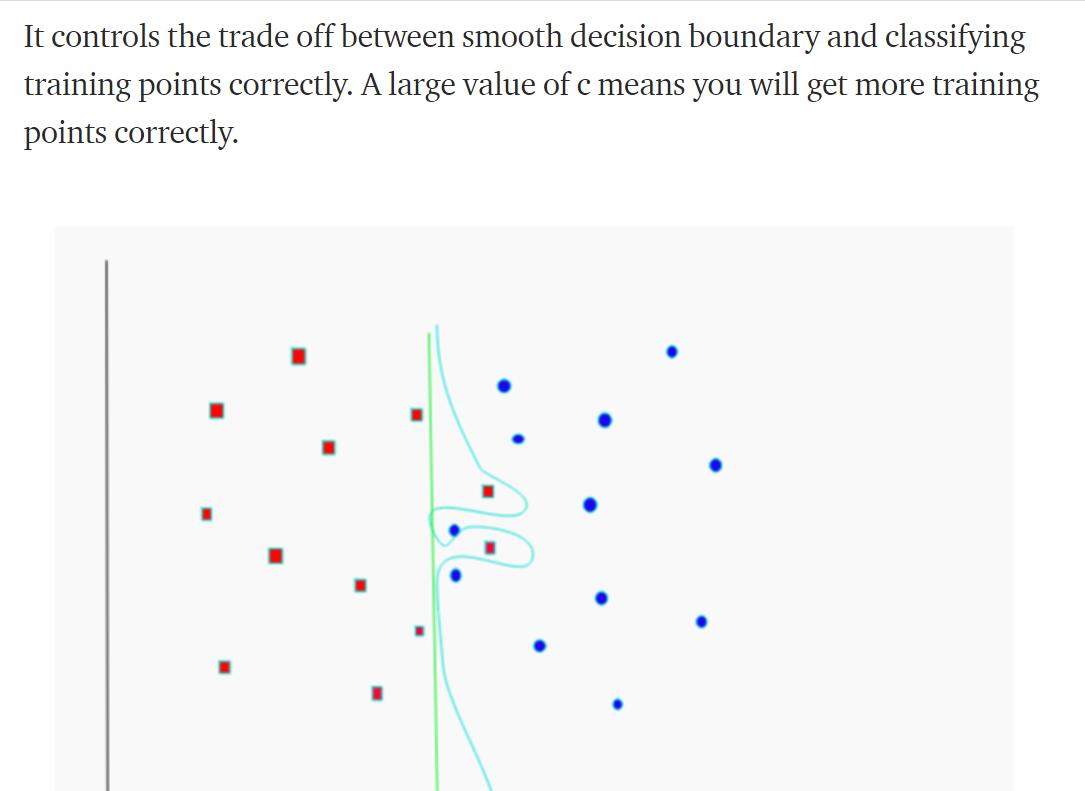

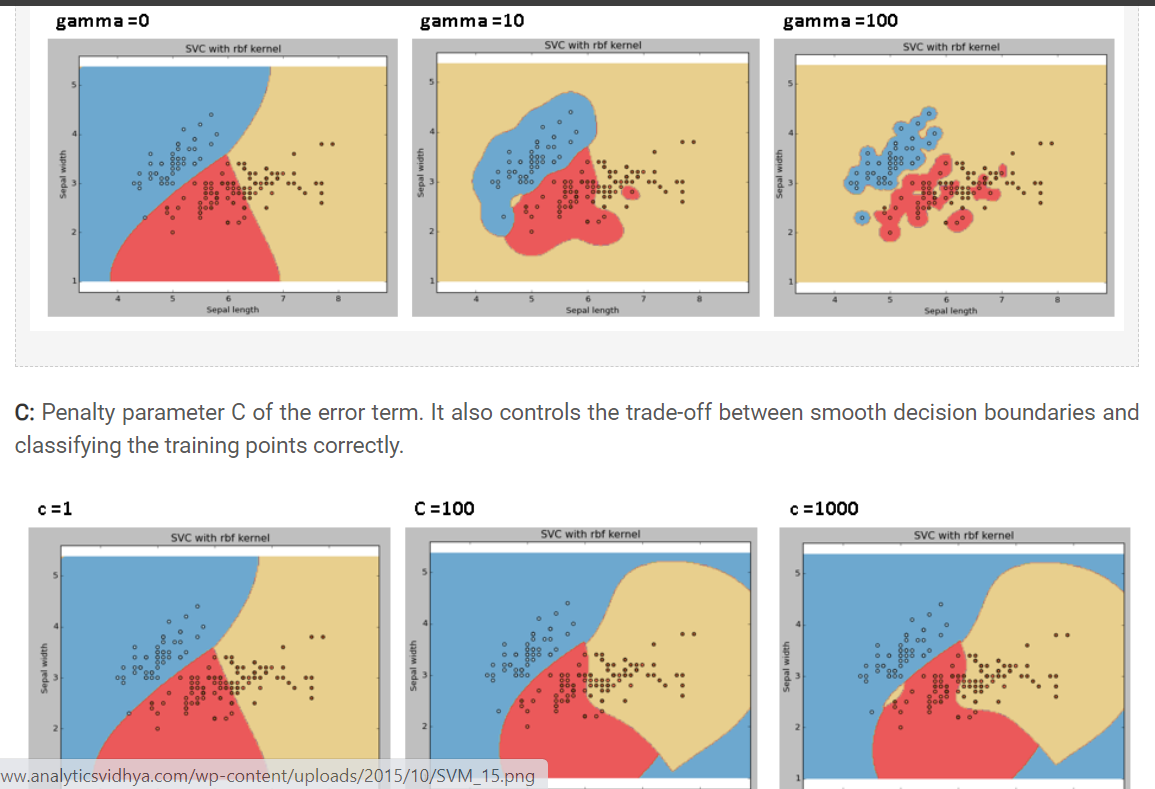

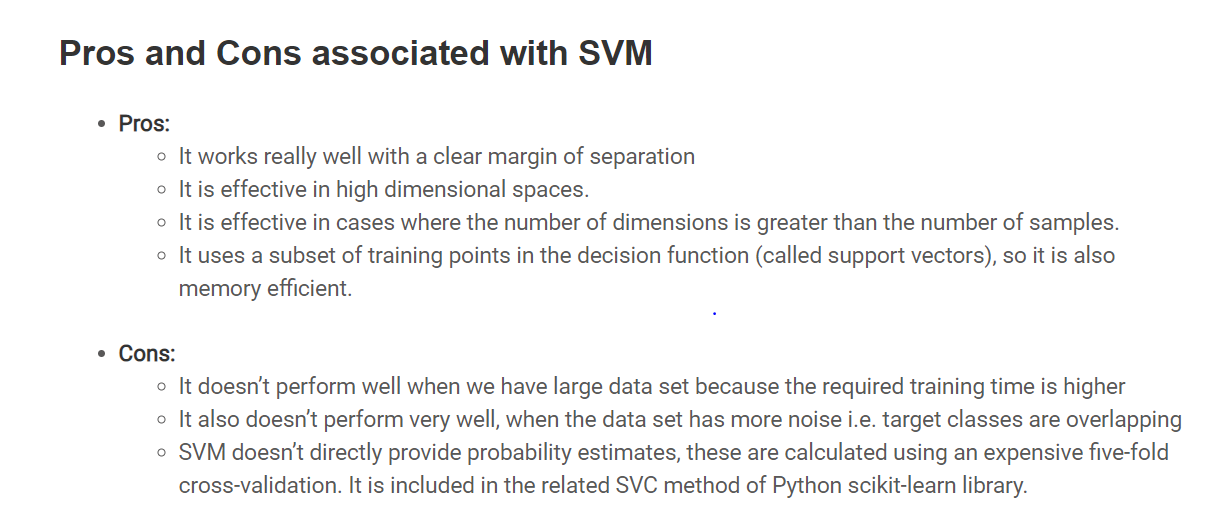

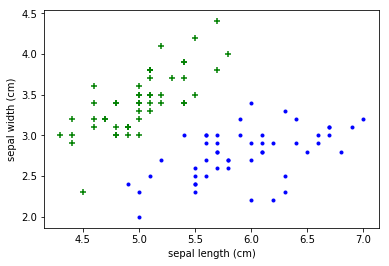

In [21]:
import pandas as pd
from sklearn.datasets import load_iris
iris =load_iris()
dir(iris) #['DESCR', 'data', 'feature_names', 'target', 'target_names']
iris.feature_names

df=pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()
df['target']=iris.target #append target column
df.head()

iris.target_names #array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

df[df.target==2].head()

df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
df.head()

# Visualization

from matplotlib import pyplot as plt
%matplotlib inline

df0=df[df.target==0]
df1=df[df.target==1]
df2=df[df.target==2]

df2

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'], color='green', marker='+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'], color='blue', marker='.')

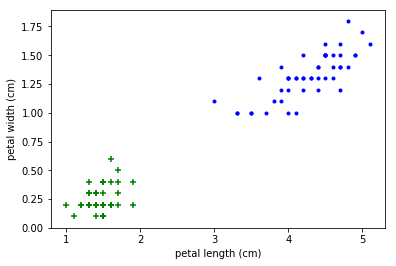

In [22]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'], color='green', marker='+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'], color='blue', marker='.')

In [37]:
from sklearn.model_selection import train_test_split
X=df.drop(['target','flower_name'], axis='columns')
X.head()
Y=df.target

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)
len(x_train) #120
len(x_test) #30

from sklearn.svm import SVC
model=SVC(C=10) # by C value score will reduse and C means regularization
#model=SVC(gamma=100) # by gamma it will reduse to 46%
#model=SVC(kernel='linear') # default is rbf . score will be 1
model.fit(x_train,y_train)
model.score(x_test,y_test) #1


1.0

In [ ]:
#Parameter Tuning with GridSearch
#https://medium.com/@aneesha/svm-parameter-tuning-in-scikit-learn-using-gridsearchcv-2413c02125a

grid = GridSearchCV(estimator, param_grid, scoring, cv)
    
#K -Fold Cross validation is the technique where we keep a part of dataset and do not train on it and use that part 
#for testing or validation.
#Grid Search : This is used to tune our hyperparameters and get the best set of parameters

#The question is how GridSearch and Cross Validation are inter linked. Is it necessary that I have to use both of them 
#simultaneously or I can use them independently.

#Please explain how this below line is evaluated :
grid = GridSearchCV(estimator=lasso_clf, model_grid, cv=LeaveOneOut(train.shape[0]),scoring=‘mean_squared_error’)

#You can just cross validate your model using k-fold or if you use another technique for validation you can just use grid 
#search to find the optimum parameters for your model. The reason we link both is usually you want to cross validate your
#model and want to have best parameters too at the same time(machine learning competitions).

#The simplified syntax for grid search in sklearn is

  clf = GridSearchCV(estimator, param_grid, scoring, cv)
#Where estimator is your model and parameters are options you want to set for your grid search. Including options like 
#param_grid, this is a dictionary of parameters you want to run your search for, etc.

#Coming to your code,

 grid = GridSearchCV(estimator=lasso_clf, model_grid,
#You are creating a grid search for a model lasso_clf and model_grid is your parameters for the search.

  cv=LeaveOneOut(train.shape[0]),scoring=‘mean_squared_error’)
#here cv tells how you want to split your dataset for validation. scoring is the metric you are using to test your model’s
#accuracy, in this case since it is regression model you have used mean_squared_error as the metric.

In [ ]:
########################## Exercise #######################
#Digits datsets 